# Описание данных

Датасет содержит:

* **Cust_id** - ID клиента;
* **AVG_Actual_price_12** - Purchase_Value/No_of_Items;
* **Purchase_Value** - объем покупок;
* **No_of_Items** - количество купленных единиц товара;
* **Total_Discount** - конечная скидка;
* **MONTH_SINCE_LAST_TRANSACTION** - месяцев с момента последней покупки.

# Оглавление

## 1. Загрузка и предобработка данных.
## 2. Поиск закономерностей и визуализация.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## 1. Загрузка и предобработка данных.

In [2]:
purchase = pd.read_csv ('C:/Users/Александр/pj/pet_projects/SuperMarket_Dataset/SupermarketPurchase.csv')
purchase.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [3]:
# переименуем столбцы для удобства
purchase.rename(columns={'AVG_Actual_price_12':'Avg_MRP',
                         'Purchase_Value':'Purchase_amount', 
                         'No_of_Items':'Items_Qty',
                         'MONTH_SINCE_LAST_TRANSACTION':'Transaction_month'},
                         inplace=True)
purchase.head()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [4]:
# заметили то, что общая скидка указана с минусом для некоторых клиентов. скидка не может быть отрицательной, нужно исправить
purchase.query('Total_Discount < 0').head()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month
33,49,6903.933333,20711.80,3,-1411.80,5
34,50,5726.980000,5726.98,1,-626.98,4
73,102,1298.546667,3895.64,3,-395.64,3
77,108,8029.005000,22795.64,3,-2495.64,4
222,310,2358.170000,2358.17,1,-258.17,4


In [5]:
purchase.query('Total_Discount < 0').Total_Discount.count()

18

In [6]:
# исправим минусовые значения
purchase['Total_Discount'] = purchase['Total_Discount'].astype(str).str.strip('\-')
purchase['Total_Discount'] = purchase['Total_Discount'].astype(np.float)
purchase.query('Total_Discount < 0').Total_Discount.count()

0

In [7]:
purchase.isnull().sum(),purchase.shape

(Cust_id              0
 Avg_MRP              0
 Purchase_amount      0
 Items_Qty            0
 Total_Discount       0
 Transaction_month    0
 dtype: int64,
 (702, 6))

In [8]:
# посмотрим на типы данных
purchase.dtypes

Cust_id                int64
Avg_MRP              float64
Purchase_amount      float64
Items_Qty              int64
Total_Discount       float64
Transaction_month      int64
dtype: object

In [9]:
purchase.describe()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20846.272764,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58413.542363,3.562840
min,1.000000,22.500000,45.000000,1.000000,0.000000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2642.500000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [10]:
print("Avg_MRP:",purchase['Avg_MRP'].nunique())
print("Purchase Value:",purchase['Purchase_amount'].nunique())
print("Total_Discount:",purchase['Total_Discount'].nunique())
print("Qty of Items:",purchase['Items_Qty'].nunique())
print("Transaction_month:",purchase['Transaction_month'].nunique())

Avg_MRP: 514
Purchase Value: 511
Total_Discount: 454
Qty of Items: 67
Transaction_month: 12


In [11]:
pd.DataFrame([{'Avg_MRP': len(purchase['Avg_MRP'].value_counts()),    
               'Purchase_amount': len(purchase['Purchase_amount'].value_counts()),
               'Total_Discount': len(purchase['Total_Discount'].value_counts()),
               'Items_Qty': len(purchase['Items_Qty'].value_counts()),
               'Transaction_month':len(purchase['Transaction_month'].value_counts()),
              }], columns = ['Avg_MRP', 
                             'Purchase_amount', 
                             'Total_Discount',
                             'Items_Qty', 
                             'Transaction_month'], 
            index=['Cust_id'])

,Avg_MRP,Purchase_amount,Total_Discount,Items_Qty,Transaction_month
Cust_id,514,511,454,67,12


In [12]:
duplicate ='Количество дублей:{}'.format(purchase.duplicated().sum())

print(duplicate)

Количество дублей:0


## 2. Поиск закономерностей и визуализация.

In [13]:
purchase['Purchase_without_discount'] = (purchase['Purchase_amount'] + purchase['Total_Discount'])

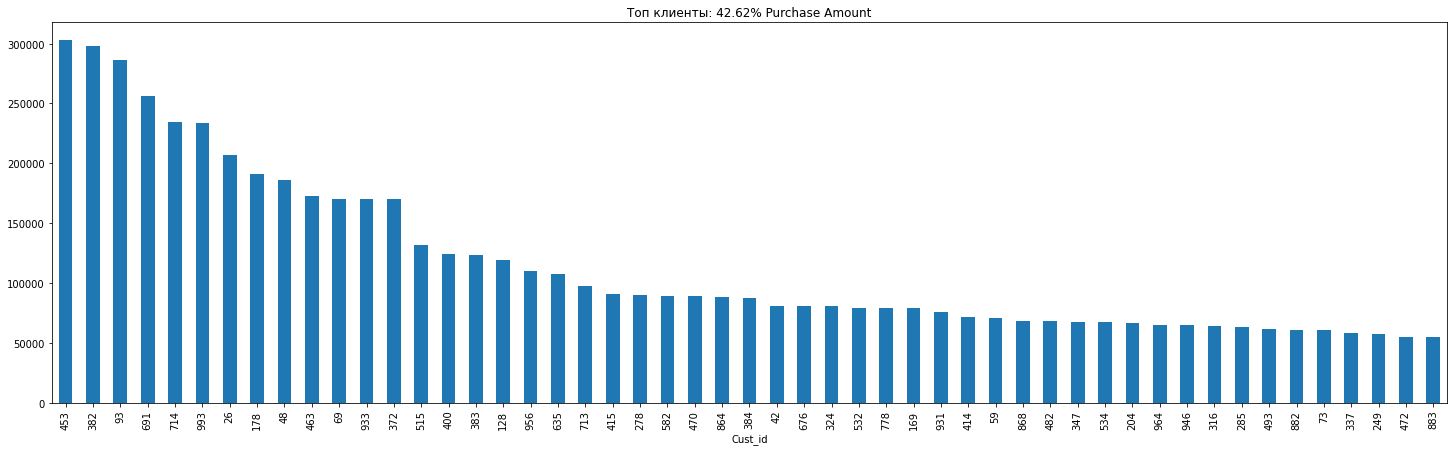

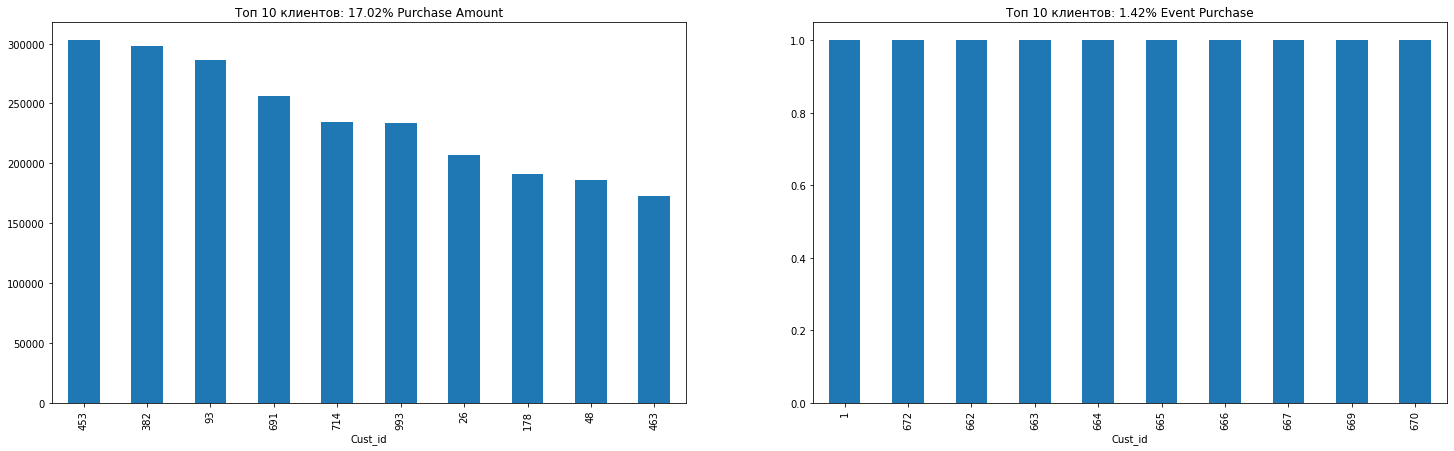

In [14]:
fig = plt.figure(figsize=(25, 7))
PercentPurchase =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:51].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Топ клиенты: {:3.2f}% Purchase Amount'.format(PercentPurchase))

fig = plt.figure(figsize=(25, 7))

f1 = fig.add_subplot(121)
PercentPurchase1 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.sum().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.sum().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Топ 10 клиентов: {:3.2f}% Purchase Amount'.format(PercentPurchase1))
    
f2 = fig.add_subplot(122)
PercentPurchase2 =  np.round((purchase.groupby(["Cust_id"]).Purchase_amount.count().\
                          sort_values(ascending = False)[:10].sum()/purchase.groupby(["Cust_id"]).\
                          Purchase_amount.count().sort_values(ascending = False).sum()) * 100, 2)

g = purchase.groupby(["Cust_id"]).Purchase_amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Топ 10 клиентов: {:3.2f}% Event Purchase'.format(PercentPurchase2))

1     152
2      86
3      63
4      62
5      62
7      54
11     48
6      43
8      40
12     38
10     34
9      20
Name: Transaction_month, dtype: int64

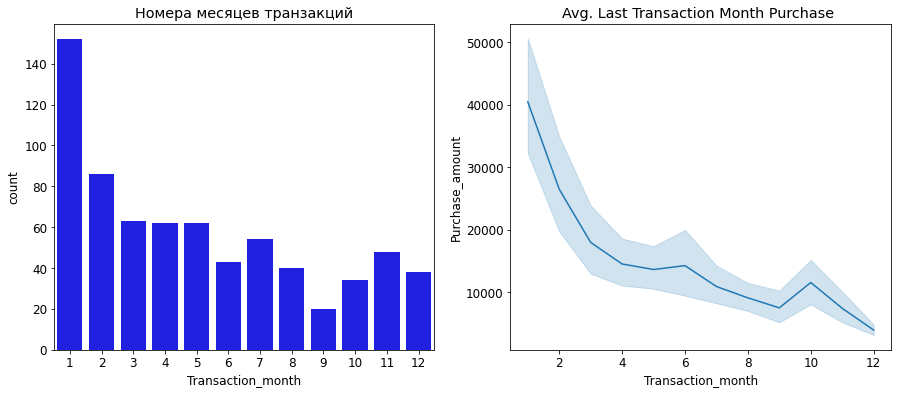

In [15]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

plt.subplot(1, 2, 1)
sns.countplot(purchase['Transaction_month'], color = 'blue')
plt.title('Номера месяцев транзакций')

plt.subplot(1, 2, 2)
sns.lineplot(x=purchase['Transaction_month'], y=purchase['Purchase_amount'])
plt.title('Avg. Last Transaction Month Purchase ')

purchase['Transaction_month'].value_counts()

Text(0.5, 1.0, 'Total_Discount')

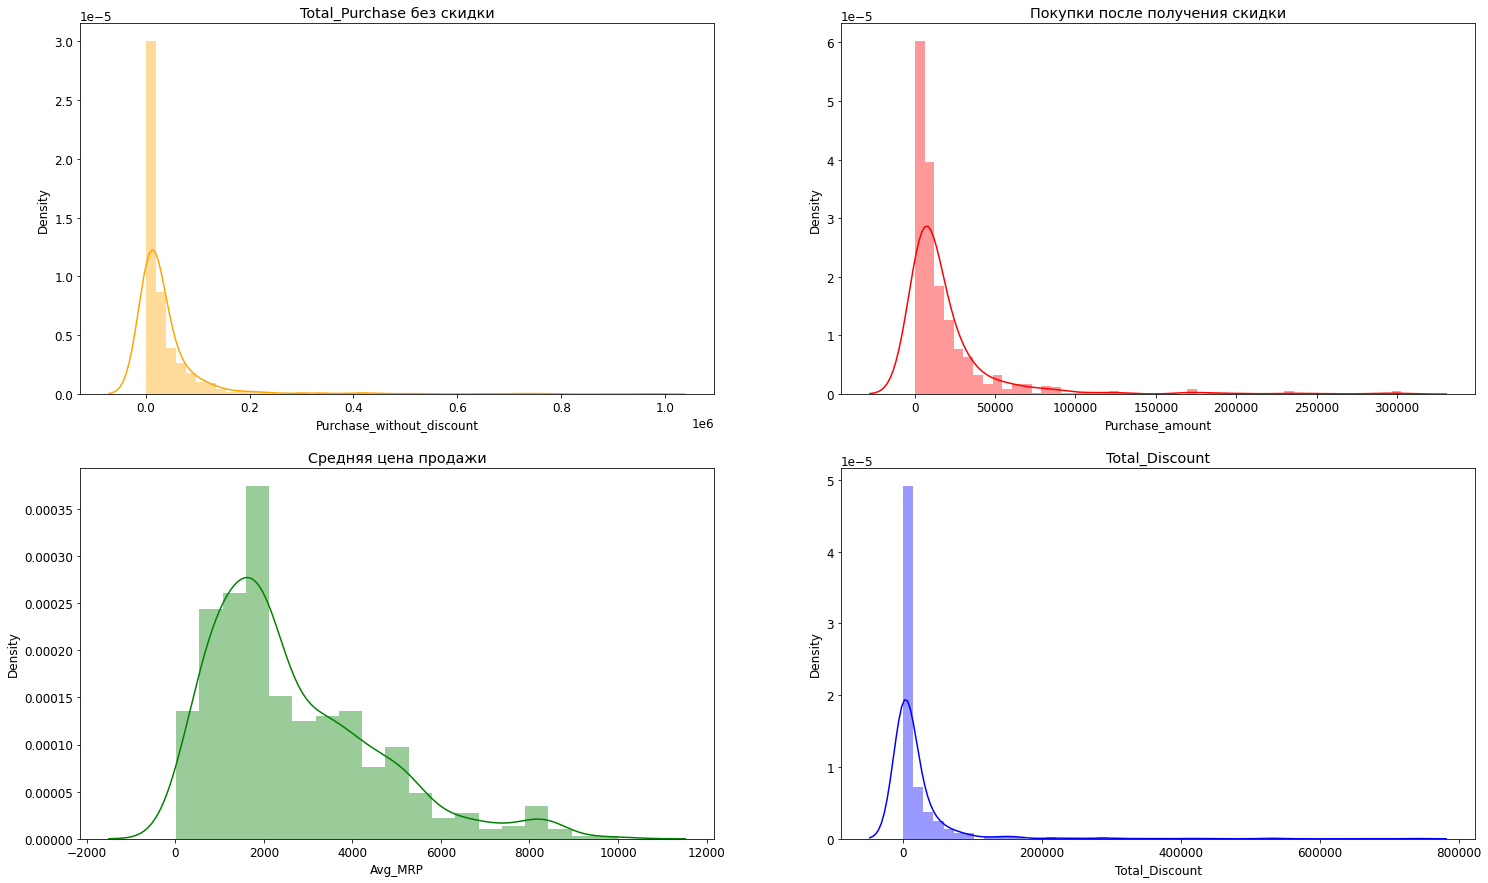

In [16]:
plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 12

plt.subplot(2, 2, 1)
sns.distplot(purchase['Purchase_without_discount'],  color = 'orange')
plt.title('Total_Purchase без скидки')

plt.subplot(2, 2, 2)
sns.distplot(purchase['Purchase_amount'],  color = 'red')
plt.title('Покупки после получения скидки')

plt.subplot(2, 2, 3)
sns.distplot(purchase['Avg_MRP'],  color = 'green')
plt.title('Средняя цена продажи')

plt.subplot(2, 2, 4)
sns.distplot(purchase['Total_Discount'],  color = 'blue')
plt.title('Total_Discount')

Распределение с положительной асимметрией для всех переменных, это означает, что переменные находятся ниже среднего значения, чем ожидалось при нормальном распределении. Но все же распределение Avg_MRP выглядит лучше, чем другие, так как разница между фактическим и ожидаемым средним значением невелика по сравнению с другими переменными.

Попытаемся решить это нормализацией переменных.

In [17]:
purchase['Purchase_amount']=np.log1p(purchase['Purchase_amount'])
purchase['Purchase_without_discount']=np.log1p(purchase['Purchase_without_discount'])
purchase['Avg_MRP']=np.log1p(purchase['Avg_MRP'])
purchase['Total_Discount']=np.log1p(purchase['Total_Discount'])
purchase['Items_Qty']=np.log1p(purchase['Items_Qty'])

In [18]:
purchase.head()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month,Purchase_without_discount
0,1,5.707110,7.090910,1.609438,0.000000,11,7.090910
1,2,7.849434,10.621657,2.833213,11.273887,2,11.693170
2,4,8.163656,8.856661,1.098612,6.660575,4,8.962007
3,8,8.418698,9.517163,1.386294,7.320527,1,9.622516
4,9,7.795267,10.417986,2.772589,9.766866,6,10.837638


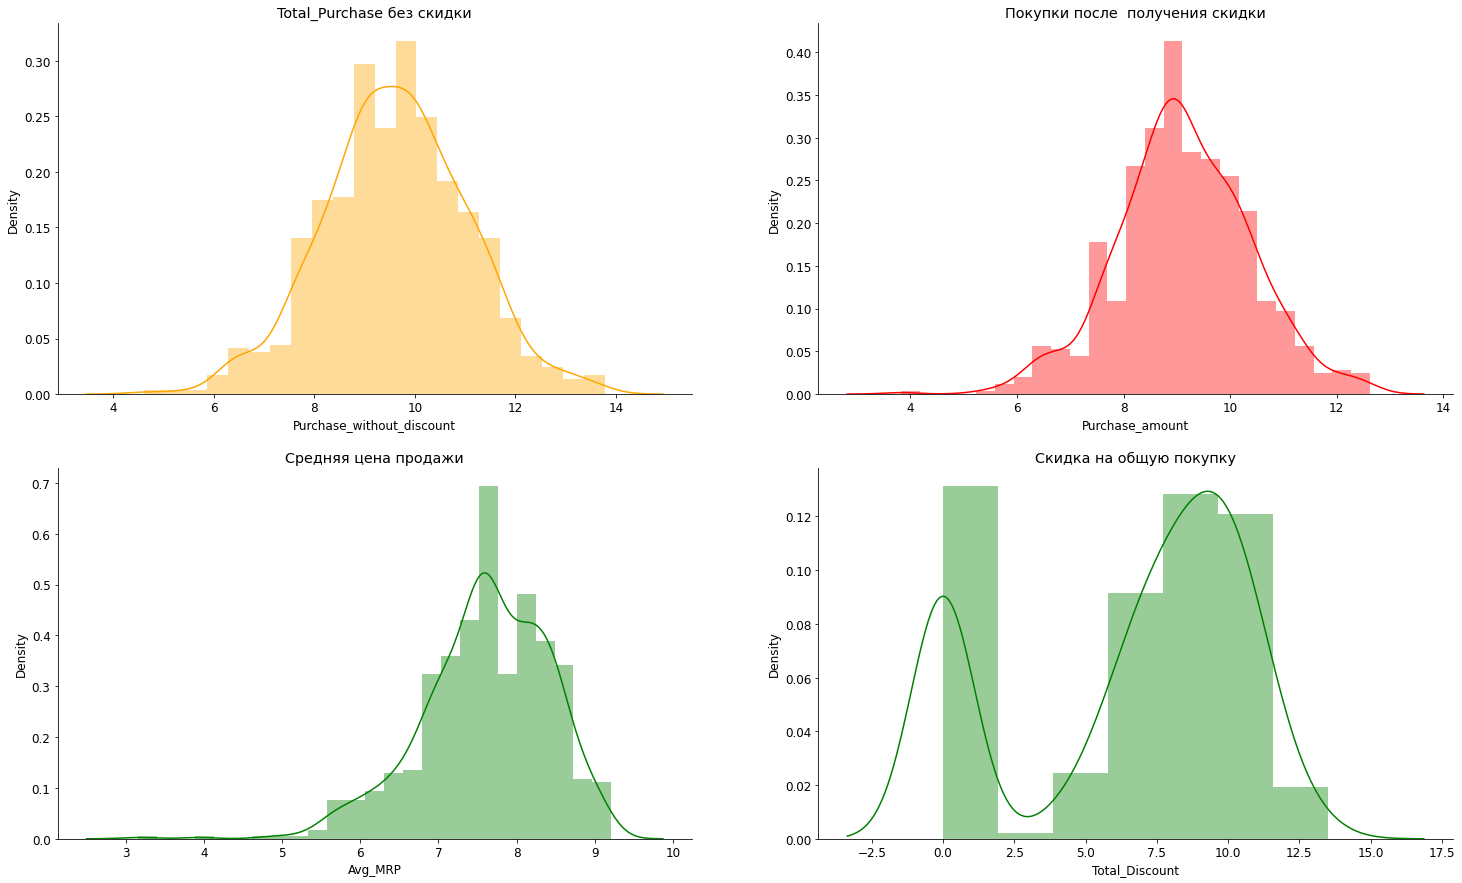

In [24]:
plt.rcParams['figure.figsize'] = (25, 15)
plt.rcParams['font.size'] = 12

plt.subplot(2, 2, 1)
sns.distplot(purchase['Purchase_without_discount'],  color = 'orange')
plt.title('Total_Purchase без скидки')

plt.subplot(2, 2, 2)
sns.distplot(purchase['Purchase_amount'],  color = 'red')
plt.title('Покупки после  получения скидки')

plt.subplot(2, 2, 3)
sns.distplot(purchase['Avg_MRP'],  color = 'green')
plt.title('Средняя цена продажи')

plt.subplot(2, 2, 4)
sns.distplot(purchase['Total_Discount'],  color = 'green')
plt.title('Скидка на общую покупку')

sns.despine()

После масштабирования переменной с помощью **log** мы видим, что Purchase_Amount и Total_Purchase_amount близки к нормальному распределению. Поскольку у нас есть небольшая разница в ожидаемом и фактическом среднем.

Обратим внимание на то, что Avg_MRP близок к нормальному распределению, но мы можем видеть, что распределение имеет левый хвост, который показывает, что Avg_MRP немного выше, чем фактическое среднее значение.

In [21]:
purchase.describe()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month,Purchase_without_discount
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,7.602673,9.119596,1.830331,6.526692,5.029915,9.609916
std,295.756706,0.813934,1.249448,0.994360,4.154183,3.562840,1.424651
min,1.000000,3.157000,3.828641,0.693147,0.000000,1.000000,4.615121
25%,245.750000,7.122665,8.343078,1.098612,0.000000,2.000000,8.699681
50%,486.500000,7.650169,9.066561,1.609438,7.879783,4.000000,9.636914
75%,763.750000,8.216358,9.961662,2.397895,9.766220,8.000000,10.569726
max,1006.000000,9.210440,12.620573,5.153292,13.506742,12.000000,13.782891


In [22]:
purchase.corr()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,Transaction_month,Purchase_without_discount
Cust_id,1.000000,0.001712,-0.046817,-0.051524,-0.035210,0.006122,-0.035525
Avg_MRP,0.001712,1.000000,0.411608,-0.236904,-0.214062,-0.072372,0.166469
Purchase_amount,-0.046817,0.411608,1.000000,0.779235,0.466693,-0.404264,0.923958
Items_Qty,-0.051524,-0.236904,0.779235,1.000000,0.624408,-0.382243,0.859246
Total_Discount,-0.035210,-0.214062,0.466693,0.624408,1.000000,-0.224075,0.683641
Transaction_month,0.006122,-0.072372,-0.404264,-0.382243,-0.224075,1.000000,-0.400931
Purchase_without_discount,-0.035525,0.166469,0.923958,0.859246,0.683641,-0.400931,1.000000


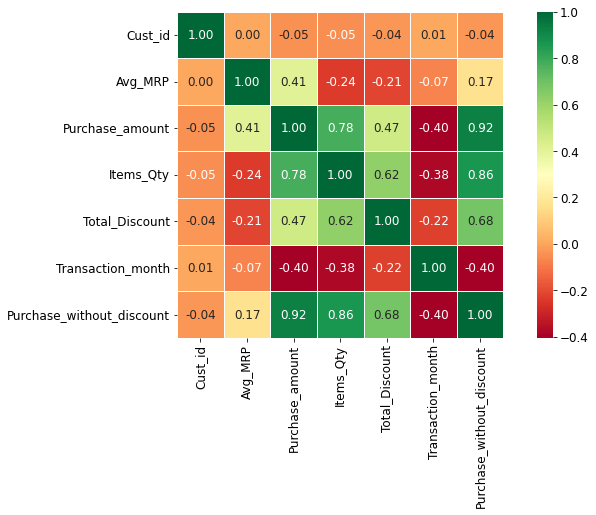

In [23]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(purchase.corr(), square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f');
plt.show()

Purchase_amount и Total_Purchase_amount сильно положительно коррелируют друг с другом, поэтому они имеют тенденцию двигаться в одном направлении.